In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint

%matplotlib inline

In [2]:
df = pd.read_csv('AEP_hourly.csv')

In [3]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [5]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [6]:
df.shape

(121273, 2)

In [7]:
df.isnull().sum()

Datetime    0
AEP_MW      0
dtype: int64

## Reformat the Date Time Columns

In [8]:
# Create a new dataframe
dataset = df

In [9]:
# Extract the Year Month Date Time Week Day
dataset['Month'] = pd.to_datetime(df['Datetime']).dt.month
dataset['Year'] = pd.to_datetime(df['Datetime']).dt.year
dataset['Date'] = pd.to_datetime(df['Datetime']).dt.date
dataset['Time'] = pd.to_datetime(df['Datetime']).dt.time
dataset['Week'] = pd.to_datetime(df['Datetime']).dt.isocalendar().week
dataset['Day'] = pd.to_datetime(df['Datetime']).dt.day_name()

In [10]:
dataset.head()

,Datetime,AEP_MW,Month,Year,Date,Time,Week,Day
0,2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
1,2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2,2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
3,2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
4,2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
 2   Month     121273 non-null  int32  
 3   Year      121273 non-null  int32  
 4   Date      121273 non-null  object 
 5   Time      121273 non-null  object 
 6   Week      121273 non-null  UInt32 
 7   Day       121273 non-null  object 
dtypes: UInt32(1), float64(1), int32(2), object(4)
memory usage: 6.1+ MB


In [12]:
dataset = df.set_index('Datetime')

In [13]:
dataset.index = pd.to_datetime(dataset.index)

In [14]:
dataset.head(1)

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday


In [15]:
print(dataset.index.dtype)

datetime64[ns]


In [16]:
# What are the unique years we have in the dataset
print(dataset.Year.unique())

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018]


In [17]:
# How many unique years do we have in the dataset
print('Total number of unique years:', dataset.Year.nunique())

Total number of unique years: 15


## Energy consumption each year

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


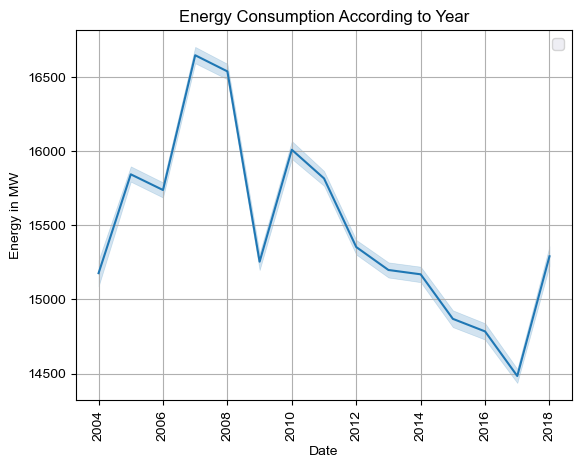

In [18]:
from matplotlib import style

fig = plt.figure()
axl = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset['Year'], y=dataset['AEP_MW'], data=df)
sns.set(rc={'figure.figsize':(20,10)})

plt.title('Energy consumption Year 2004')
plt.xlabel('Date')
plt.ylabel('Energy in MW')
plt.grid(True)
plt.legend()

for label in axl.xaxis.get_ticklabels():
    label.set_rotation(90)
    
plt.title('Energy Consumption According to Year');

## Energy Distribution

C:\Users\Dell\AppData\Local\Temp\ipykernel_27252\3671383474.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['AEP_MW'])


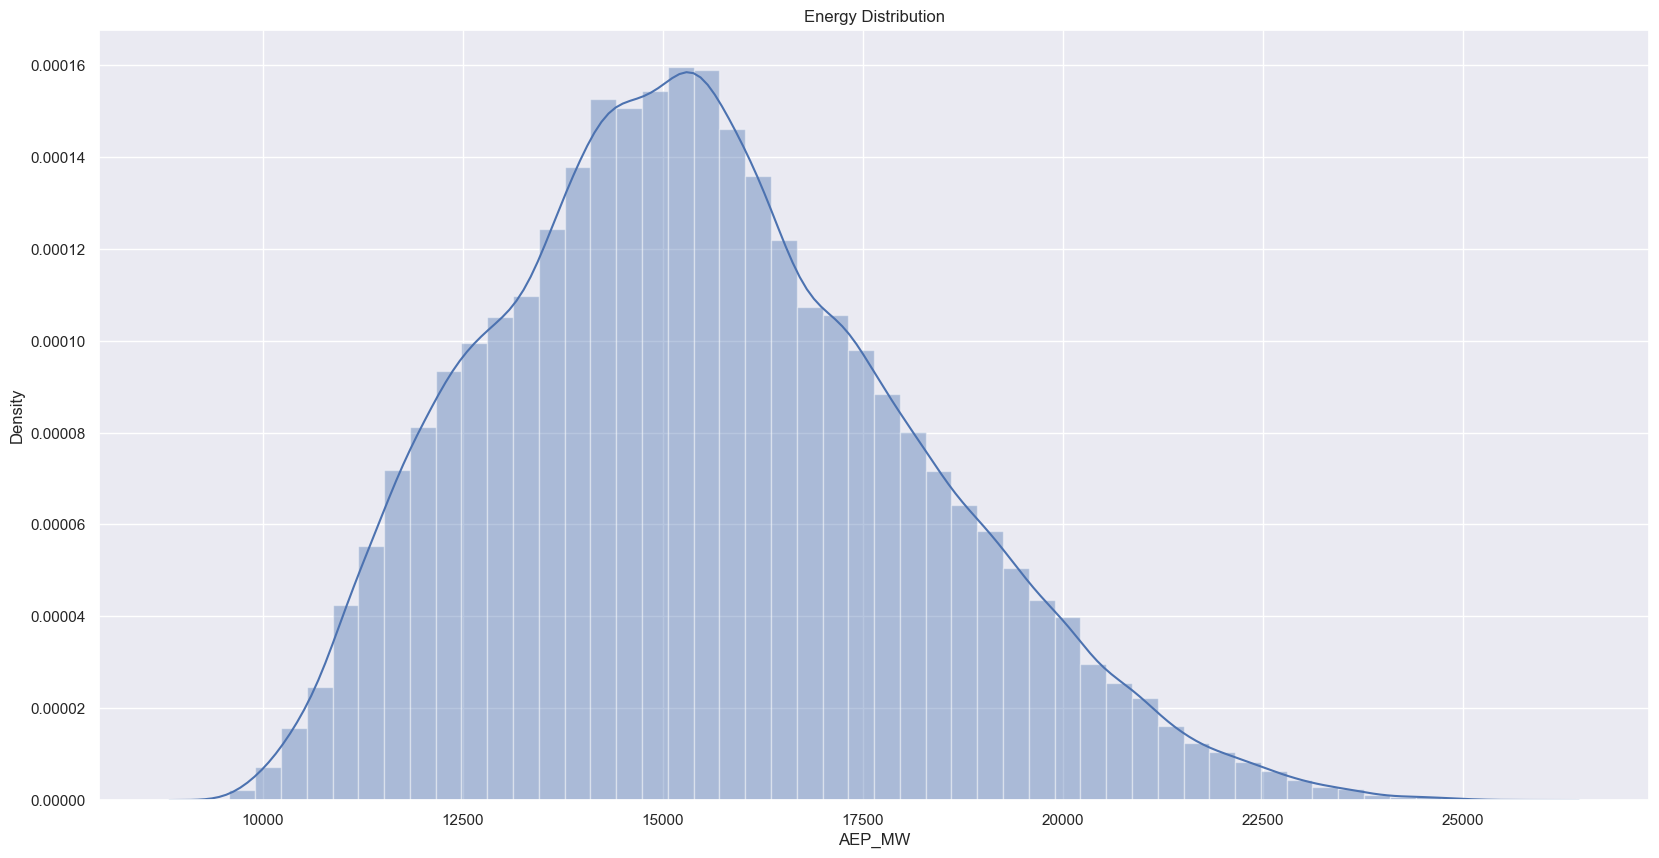

In [19]:
sns.distplot(dataset['AEP_MW'])
plt.title('Energy Distribution');

## Energy with respect to time

In [ ]:
print(dataset['Time'].dtype)
print(dataset['AEP_MW'].dtype)

# Remove NaN or invalid rows
dataset = dataset.dropna(subset=['Time', 'AEP_MW'])

In [ ]:
dataset['Time'] = pd.to_datetime(dataset['Time'], errors='coerce')

In [ ]:
print(dataset['Time'].dtype)

In [ ]:
dataset.columns = dataset.columns.str.strip()

In [ ]:
print(dataset[['Time', 'AEP_MW']].head())
print(dataset[['Time', 'AEP_MW']].isnull().sum())

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Time' is a datetime object
dataset['Time'] = pd.to_datetime(dataset['Time'], errors='coerce')

# Drop NaN values in Time or AEP_MW
dataset = dataset.dropna(subset=['Time', 'AEP_MW'])

# Plot
fig = plt.figure()
ax1 = fig.add_subplot(111)

sns.lineplot(x='Time', y='AEP_MW', data=dataset)
plt.title('Energy Consumption vs Time')
plt.xlabel('Time')
plt.ylabel('AEP (MW)')
plt.grid(True, alpha=0.5)

# Rotate x-axis labels
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.show()